In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [16]:
#load the data
df = pd.read_csv('epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


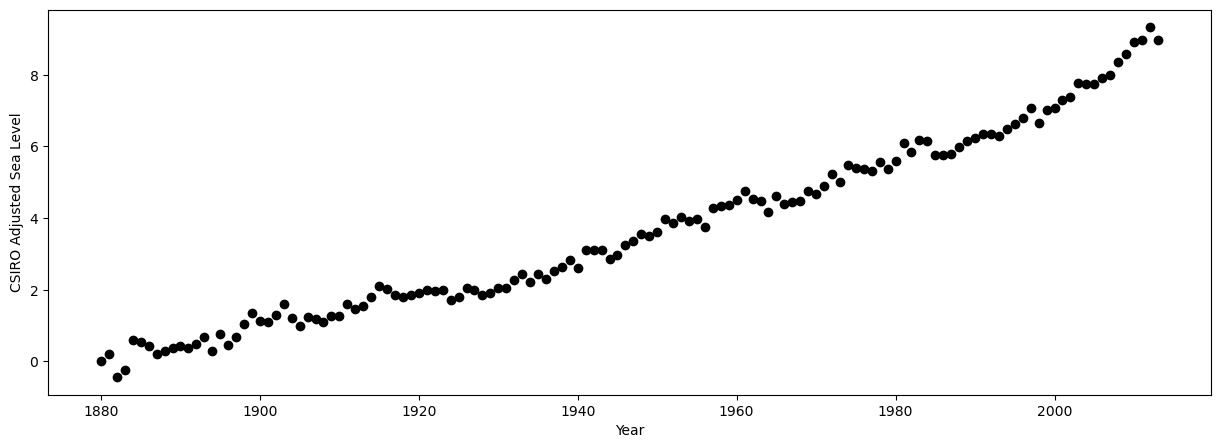

In [17]:
#Create a graph for adjusted sea level through the years
fig,ax = plt.subplots(figsize=(15,5))
plt.scatter(x=df['Year'].values, y=df['CSIRO Adjusted Sea Level'].values,color='black')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.show()

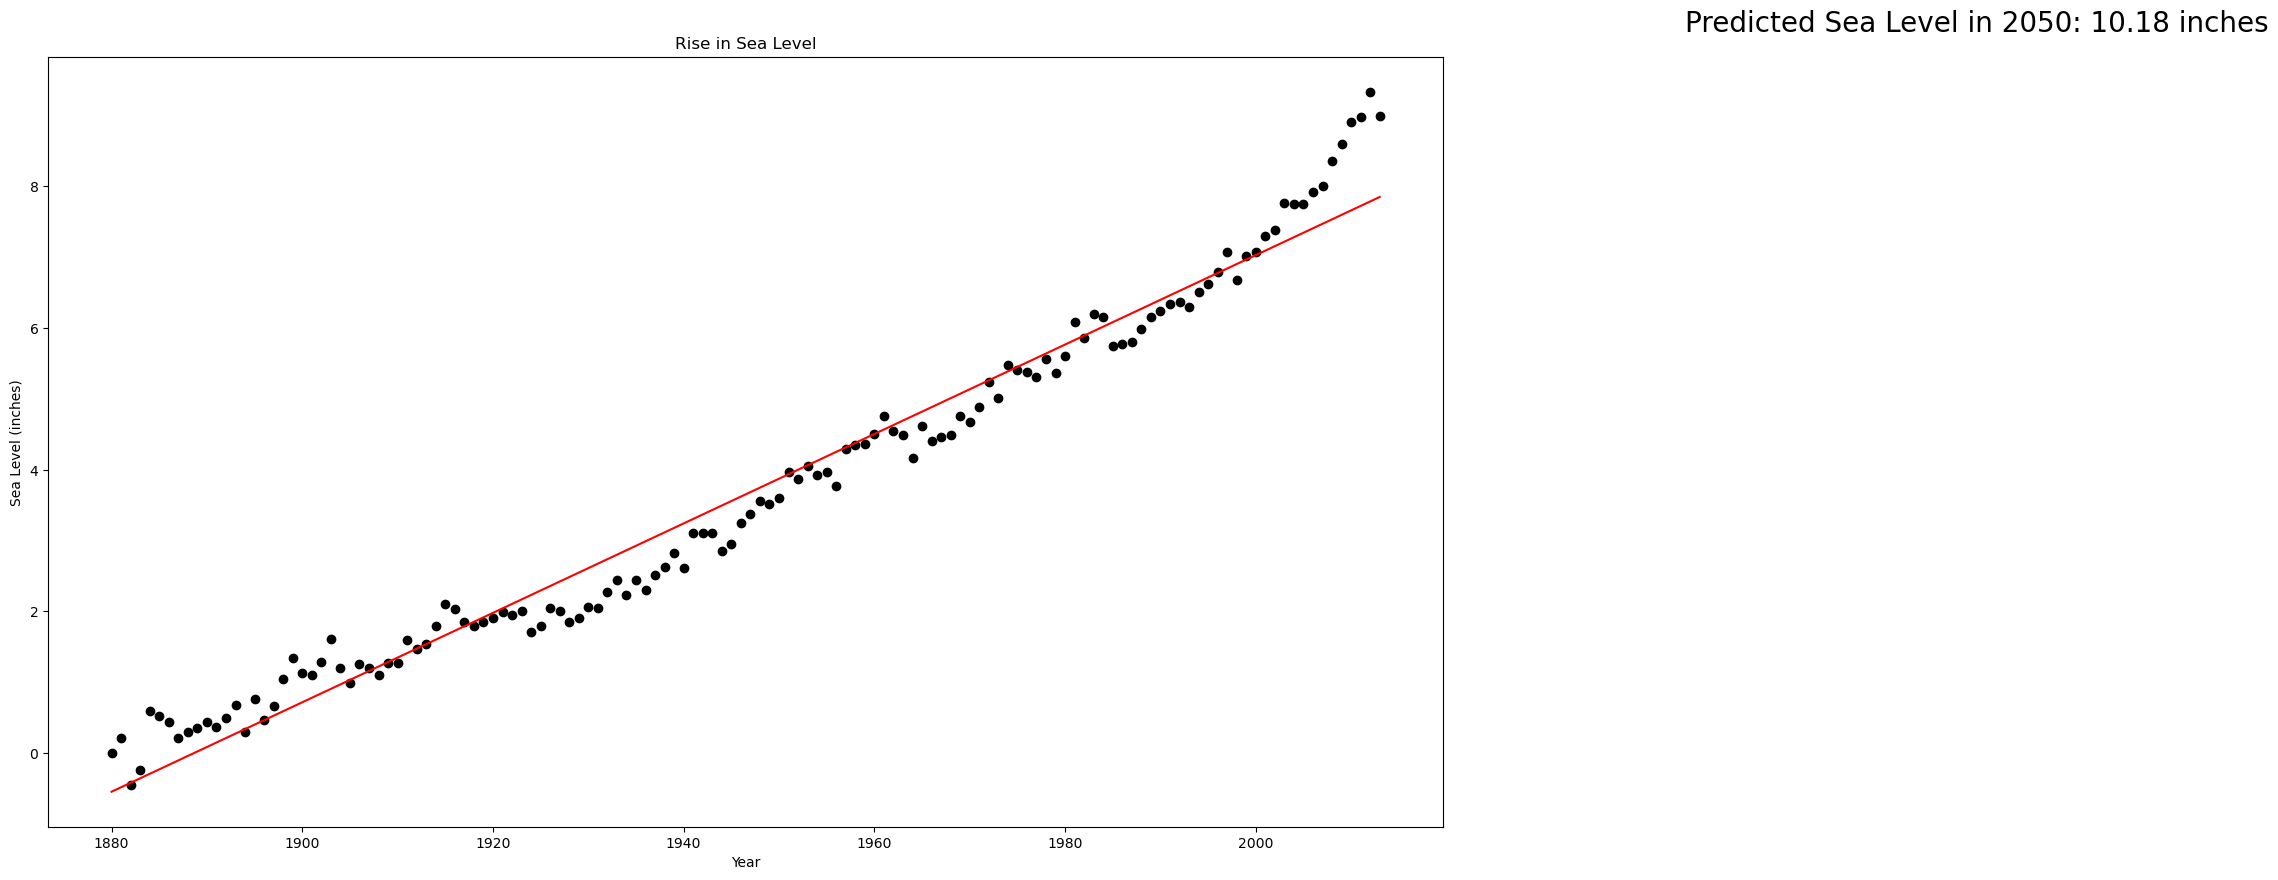

In [56]:
#Add first line of best fit
fig, ax = plt.subplots(figsize=(18,10))
plt.scatter(df['Year'].values, df['CSIRO Adjusted Sea Level'].values, color='black')
regress = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
plt.plot(
    df["Year"],
    regress.intercept + regress.slope * df["Year"],
    c="r",
    label="fit all",
)
#Predict the sea level rise in 2050
sea_level_2050 = regress.intercept + regress.slope * 2050
plt.text(2045, sea_level_2050, f"Predicted Sea Level in 2050: {sea_level_2050:.2f} inches", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")
plt.show()

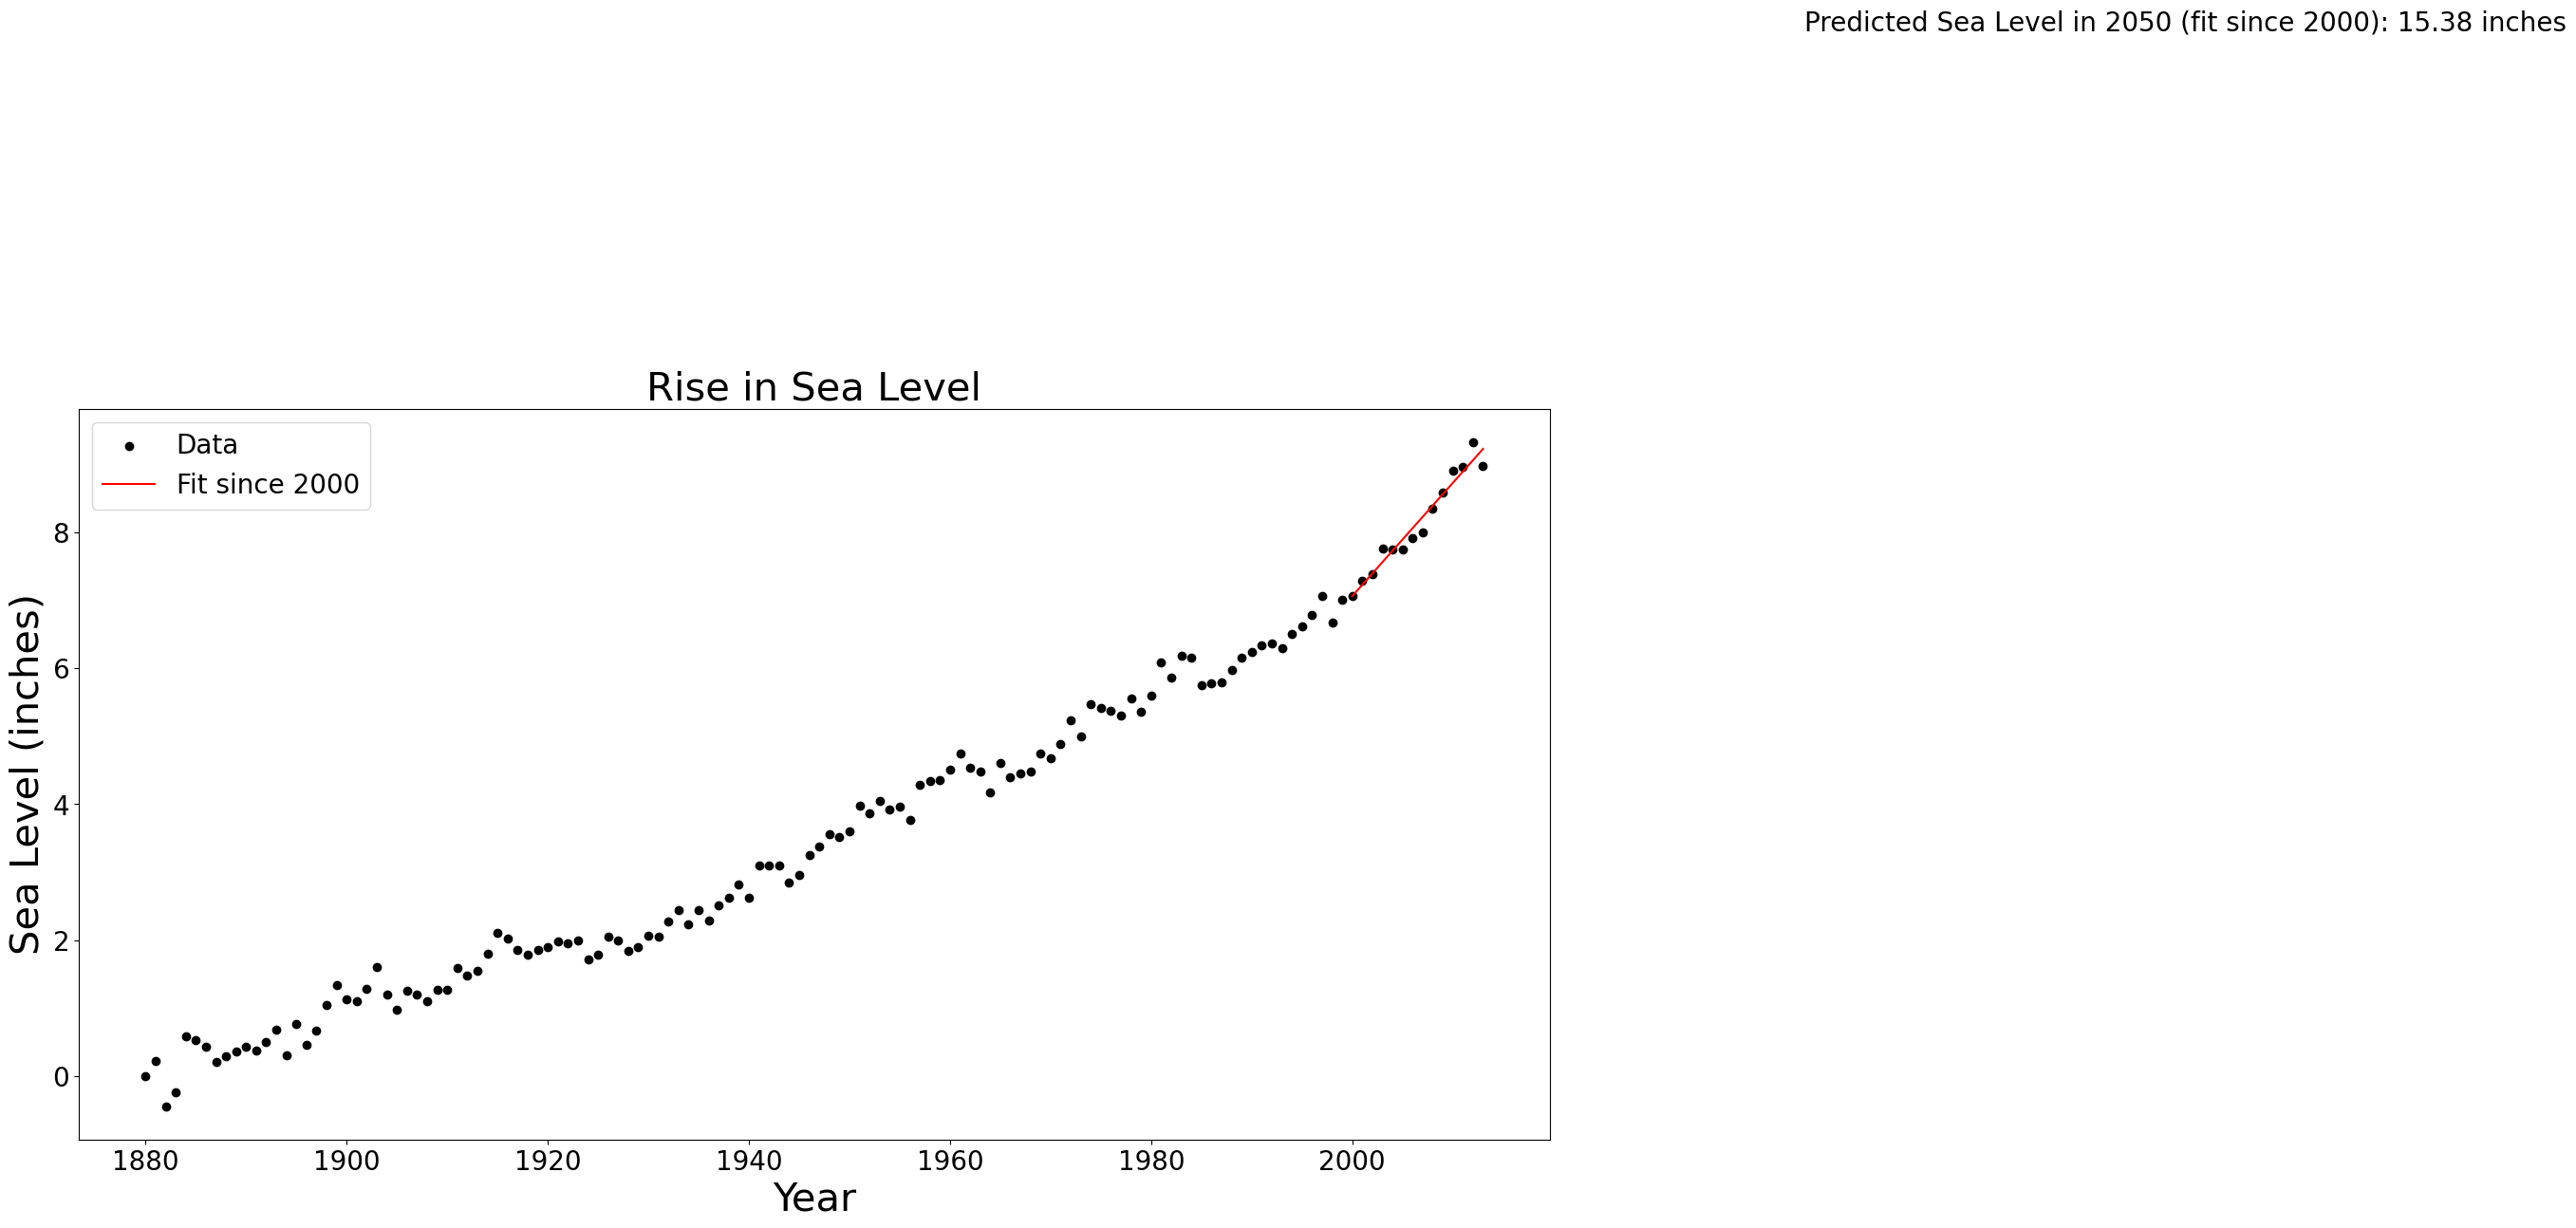

In [66]:
#create second line of best fit
plt.rcParams.update({'font.size': 20})
fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(df['Year'].values , df['CSIRO Adjusted Sea Level'].values, label='Data',c='black')

#filtered data frame
df_new = df[(df['Year'] >= 2000) & (df['Year'] <= df['Year'].max())]

#Create second line of best fit
regress_new = linregress(df_new['Year'], df_new['CSIRO Adjusted Sea Level'])
sea_level_2050_new = regress_new.intercept + regress_new.slope * 2050
plt.plot(df_new['Year'].values, regress_new.intercept + regress_new.slope * df_new['Year'], label='Fit since 2000',c='r')
plt.text(2045, sea_level_2050_new, f"Predicted Sea Level in 2050 (fit since 2000): {sea_level_2050_new:.2f} inches", fontsize=20)

plt.xlabel('Year',fontsize=30)
plt.ylabel('Sea Level (inches)',fontsize=30)
plt.title('Rise in Sea Level',fontsize=30)
plt.legend()
plt.show()